# Training Set Expansion

## Get Datasets

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
# print shape of the data
X, y = mnist['data'], mnist['target']

print("X shape = ", X.shape)
print("y shape = ", y.shape)

X shape =  (70000, 784)
y shape =  (70000,)


In [4]:
# make Test sets and training sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Shuffle data
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Expand Datasets

In [5]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

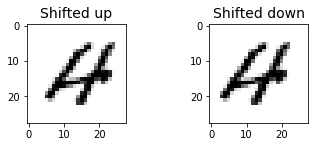

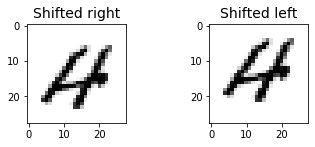

In [14]:
# test if this methods works
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

image = X_train[1000]

shifted_image_left = shift_image(image, 0, -1)
shifted_image_right = shift_image(image, 0, 1)
shifted_image_up = shift_image(image, 1, 0)
shifted_image_down = shift_image(image, -1, 0)

# plot datasets
plt.figure()

plt.subplot(221)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(222)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

plt.subplot(223)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(224)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [15]:
X_train_expanded = [image for image in X_train]
y_train_expanded = [image for image in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_expanded.append(shift_image(image, dx, dy))
        y_train_expanded.append(label)
        
X_train_expanded = np.array(X_train_expanded)
y_train_expanded = np.array(y_train_expanded)

In [19]:
# shuffle train set
random_idx = np.random.permutation(len(X_train_expanded))
X_train_expanded = X_train_expanded[random_idx]
y_train_expanded = y_train_expanded[random_idx]

## Train & Test model (Scaled Random Forest Classification)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Scale Training set & Test set
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_expanded)
X_test_scale = scaler.fit_transform(X_test)

In [21]:
clf = RandomForestClassifier()
clf.fit(X_train_scale, y_train_expanded)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train_scale, y_train_expanded, cv=3, scoring="accuracy")

array([0.97417, 0.97411, 0.97447])

In [23]:
# Test Score

prediction = clf.predict(X_test_scale)
result = (prediction == y_test).mean()

print(result)

0.969
